# Ecuaciones de Euler de la rotación | Engranaje desalineado con eje

[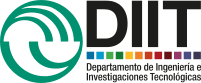](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2021 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

## Enunciado
El engranaje de la figura tiene una masa de $10\,\mathrm{kg}$ y está montado con una inclinación de $10^o$ al eje de masa despreciable sujeto por los cojinetes $A$ y $B$.
El cojinete $A$ es de empuje, por lo que provee reacción también en la dirección longitudinal al eje en tanto que el $B$ solo lo hace en las direcciones transversales.
Los momentos de inercia del engranaje son $I_z = 0,1\,\mathrm{kg m^2}$ y el $I_y = 0,05\,\mathrm{kg m^2}$.
El eje gira con velocidad angular constante.
1. Determine las reacciones que deben proveer los cojinetes.

![](figuras/hibb21_4.png "engranaje")  

## Ecuaciones de Euler-Lagrange para la rotación

$$
(I_j - I_k) \Omega_j \Omega_k - I_i \dot{\Omega}_i + \tau_i = 0
$$

Teniendo los $\tau_{x,y,z}$ se pueden expresar las ecuaciones de Euler en los ejes $x,y,z$

$$
\left\{
\begin{aligned}
(I_y - I_z) \Omega_y \Omega_z - I_1 \frac{d \Omega_x}{d t} + \tau_x &= 0\\
(I_z - I_x) \Omega_z \Omega_x - I_2 \frac{d \Omega_y}{d t} + \tau_y &= 0\\
(I_x - I_y) \Omega_x \Omega_y - I_3 \frac{d \Omega_z}{d t} + \tau_z &= 0
\end{aligned}
\right.
$$

Para calcular los torques $\tau_i$ hay que analizar las fuerzas que actuan sobre el sistema.

## Fuerzas de reacción de los cojinetes
Además de la fuerza peso que se considera actua sobre el centro del engranaje, punto $G$, hay que descomponer las reacciones en los cojinetes $A$ y $B$.
Estas componentes $A_i$ y $B_i$ se muestra esquemáticamente en la figura siguiente.

![](figuras/hibb21_4_res.png "descomposición de reacciones")  

## Cálculo de los torques $\tau_i$

Calculamos primero el $\vec{\tau}$ debido a las reacciones.

Desde el centro del engranaje $G$ al
- punto $A$ hay un $\vec{r}_{\overline{GA}} = d_{GA} \hat{Z} = 0.2\,\mathrm{m} \hat{Z}$
- punto $B$ hay un $\vec{r}_{\overline{GB}} = - d_{GB} \hat{Z} = - 0.25\,\mathrm{m} \hat{Z}$

Las reacciones propuestas:
- En $A$, $F_{A} = A_x \hat{X} + A_y \hat{Y} + A_z \hat{Z}$
- En $B$, $F_{B} = B_x \hat{X} + B_y \hat{Y}$

In [1]:
# biblioteca de cálculo simbólico
import sympy as sym
import sympy.physics.mechanics as mech
mech.init_vprinting() # notación con puntos para derivadas temporales

Utilizarémos dos sistemas cartesianos de coordenadas.
El alineado con el eje, que se denota con mayúsculas los agruparemos en el sistema M.
Para el sistema alineado con el engranaje utilizaremos el N que definiremos girando $\theta = -10^o$ en torno al eje $\hat{X}$ del sistema M.

In [2]:
# Sistemas cartesianos
M = sym.physics.vector.ReferenceFrame('M')
theta, omega =  sym.symbols('theta omega')
N = M.orientnew('N', 'Axis', [theta, M.x])

In [3]:
# las fuerzas de reacción de los cojinetes
Ax, Ay, Az, Bx, By = sym.symbols('A_X A_Y A_Z B_X B_Y')
F_A = Ax* M.x + Ay* M.y + Az* M.z
F_B = Bx* M.x + By* M.y

# distancias engranaje a cojinetes
d_GA, d_GB =  sym.symbols('d_{GA} d_{GB}')

r_GA = d_GA* M.z
r_GB = d_GB* (-M.z)

Con esto

$$
\begin{aligned}
\vec{\tau}_G = \vec{r} \times \vec{F} 
= \vec{r}_{\overline{GA}} \times \vec{F}_A
&+ \vec{r}_{\overline{GB}} \times \vec{F}_B \\
= \vec{r}_{\overline{GA}} \times \left( A_X \hat{X} + A_Y \hat{Y} + A_Z \hat{Z} \right)
 &+ \vec{r}_{\overline{GB}} \times \left( B_X \hat{X} + B_Y \hat{Y} \right) \\
= \left( \vec{r}_{\overline{GA}} \times A_X \hat{X} \right) + \left( \vec{r}_{\overline{GA}} \times A_Y \hat{Y} \right)
 &+ \left( \vec{r}_{\overline{GB}} \times B_X \hat{X} \right) + \left( \vec{r}_{\overline{GB}} \times B_Y \hat{Y} \right) \\
= \left( 0.2\,\mathrm{m} A_X \hat{Y} \right) + \left( - 0.2\,\mathrm{m} A_Y \hat{X} \right)
 &+ \left( - 0.25\,\mathrm{m} B_X \hat{Y} \right) + \left( 0.25\,\mathrm{m} B_Y \hat{X} \right) \\
= \left( - 0.2\,\mathrm{m} A_Y + 0.25\,\mathrm{m} B_Y \right) \hat{X}
 &+ \left( 0.2\,\mathrm{m} A_X- 0.25\,\mathrm{m} B_X  \right) \hat{Y} \\
\end{aligned}
$$
Luego este $\vec{\tau}_G$ lo descomponemos en los $\tau_i$ en los ejes $x,y,z$ en que el tensor de inercia se reduce a los momentos principales.

In [4]:
tau_G = r_GA.cross(F_A) + r_GB.cross(F_B)
tau_G_simbolo = sym.Symbol(r'\vec{\tau}_G')
sym.Eq(tau_G_simbolo, tau_G.to_matrix(M), evaluate=False )

               ⎡-A_Y⋅d_{GA} + B_Y⋅d_{GB}⎤
               ⎢                        ⎥
\vec{\tau}_G = ⎢A_X⋅d_{GA} - B_X⋅d_{GB} ⎥
               ⎢                        ⎥
               ⎣           0            ⎦

Puesto que $\hat{X} = \hat{x}$ y $\hat{Y} = \cos{\theta} \hat{y} + \sin{\theta} \hat{z}$

$$
\begin{aligned}
\vec{\tau}_G = \vec{r} \times \vec{F} 
&= \left( - 0.2\,\mathrm{m} A_Y + 0.25\,\mathrm{m} B_Y \right) \hat{x}
 + \left( 0.2\,\mathrm{m} A_X- 0.25\,\mathrm{m} B_X  \right) \left( \cos{\theta} \hat{y} + \sin{\theta} \hat{z} \right)\\
&= \left( - 0.2\,\mathrm{m} A_Y + 0.25\,\mathrm{m} B_Y \right) \hat{x}
 + \left( 0.2\,\mathrm{m} A_X- 0.25\,\mathrm{m} B_X  \right) \cos{\theta} \hat{y} 
 + \left( 0.2\,\mathrm{m} A_X- 0.25\,\mathrm{m} B_X  \right) \sin{\theta} \hat{z}\\
\end{aligned}
$$

La matriz de rotación en torno del eje $\hat{X}$ en $\theta$ es

In [5]:
N.dcm(M)

⎡1     0       0   ⎤
⎢                  ⎥
⎢0  cos(θ)   sin(θ)⎥
⎢                  ⎥
⎣0  -sin(θ)  cos(θ)⎦

Aplicandola recobramos el $\vec{\tau}_G$ en el sistema de eje del engranaje que se obtuvo manualmente.

In [6]:
tau_G_xyz = tau_G.to_matrix(N)
sym.Eq(tau_G_simbolo, tau_G_xyz, evaluate=False )

               ⎡    -A_Y⋅d_{GA} + B_Y⋅d_{GB}     ⎤
               ⎢                                 ⎥
\vec{\tau}_G = ⎢(A_X⋅d_{GA} - B_X⋅d_{GB})⋅cos(θ) ⎥
               ⎢                                 ⎥
               ⎣-(A_X⋅d_{GA} - B_X⋅d_{GB})⋅sin(θ)⎦

## Momentos de inercia $I_i$
El enunciado informa las magnitudes de $I_y$ e $I_z$.
Para conocer $I_x$ basta recordar para un cuerpo plano, como estamos considerando al engranaje, $I_z = I_x + I_y$ (ver expresión 32.10 del libro de Landau).
Además por la simetría geométrica del engranaje es claro que $I_x = I_y$.

## Velocidades $\Omega_i$ y aceleraciones angulares $\dot{\Omega}_i$ 
Se descompone la $\vec{\omega}$ del eje en los $\Omega_i$ del sistema solidario al engranaje.

Tenemos que $\vec{\omega} = \omega \hat{Z} = 30 \mathrm{s^{-1}} \hat{Z}$.
Y puesto que  $\hat{Z} = \cos{\theta} \hat{z} + \sin{\theta} \hat{y}$ con $\theta = -10^o \times \frac{\pi}{180^o}$

$$
\begin{aligned}
\Omega_z &= \omega \cos{\theta}\\
\Omega_y &= \omega \sin{\theta}.
\end{aligned}
$$
Como $\vec{\omega}$ del eje es constante todas las componentes de aceleración son nulas $\dot{\Omega}_i$ en los $x_i$ del engranaje.

In [7]:
Omega_vector = N.dcm(M)* (omega* M.z).to_matrix(M)
Omega_simbolo = sym.Symbol(r'\vec{\Omega}')
sym.Eq(Omega_simbolo, Omega_vector, evaluate=False)

               ⎡   0    ⎤
               ⎢        ⎥
\vec{\Omega} = ⎢ω⋅sin(θ)⎥
               ⎢        ⎥
               ⎣ω⋅cos(θ)⎦

## Resolución del sistema de ecuaciones

Con lo anterior el sistema a resolver se simplifica.

$$
\left\{
\begin{aligned}
(- I_y) \Omega_y \Omega_z + \tau_x &= 0\\
(I_y) \Omega_z \Omega_x + \tau_y &= 0\\
\tau_z &= 0
\end{aligned}
\right.
$$

In [8]:
I_y_simbolo = sym.Symbol('I_y')
x_EL = sym.Eq( - I_y_simbolo * Omega_vector[1]* Omega_vector[2] + tau_G_xyz[0], 0)
y_EL = sym.Eq( I_y_simbolo * Omega_vector[2]* Omega_vector[0] + tau_G_xyz[1], 0)
z_EL = sym.Eq( tau_G_xyz[2], 0)
sistema_EL = [x_EL, y_EL, z_EL]
sistema_EL

En el eje $x$

$$
\begin{aligned}
I_x \dot{\Omega}_x - (I_y - I_z) \Omega_y \Omega_z & = \tau_x \\
I_y \omega^2 \cos{\theta} \sin{\theta} & = - 0.2\,\mathrm{m} A_Y + 0.25\,\mathrm{m} B_Y
\end{aligned}
$$
De aquí tenemos una relación ente $A_Y$ y $B_Y$ que no despejo aún.

Por los ejes $y,z$

$$
\begin{aligned}
I_y \dot{\Omega}_y - (I_z - I_x) \Omega_z \Omega_x & = \tau_y \\
- I_y \Omega_z \Omega_x & = \tau_y \\
- I_y \omega^2 \cos{\theta} \sin{\theta} & = - 0.2\,\mathrm{m} A_Y + 0.25\,\mathrm{m} B_Y
\end{aligned}
$$

$$
\begin{aligned}
I_z \dot{\Omega}_z - (I_x - I_y) \Omega_x \Omega_y & = \tau_z \\
0 & = \left( 0.2\,\mathrm{m} A_X- 0.25\,\mathrm{m} B_X  \right) \sin{\theta}
\end{aligned}
$$
De esta última se obtiene

$$
B_X = \frac{0.2}{0.25} A_X = \frac{4}{5} A_X
$$

Además de estas ecuaciones se dispone de las tres ecuaciones de la 2.a ley de Newton para los tres ejes del sistema solidario al eje ($X,Y,Z$).

$$
\left\{
\begin{aligned}
A_X + B_X &= m a_X = 0\\
A_Y + B_Y - m g &= m a_Y = 0\\
A_Z &= m a_Z = 0
\end{aligned}
\right.
$$
donde $a_X = a_Y = 0$ pues para eso están los cojinetes.
En tanto que $a_Z = 0$ es _una corazonada_ pues no tenemos datos al respecto, pero es lo razonable si se espera que el eje no se salga de los cojinetes.

In [9]:
m, g = sym.symbols('m g')
x_Newton = sym.Eq(Ax + Bx, 0)
y_Newton = sym.Eq(Ay + By - m* g, 0)
z_Newton = sym.Eq(Az, 0)
sistema_Newton = [x_Newton, y_Newton, z_Newton]
sistema_Newton

Con las ecuaciones de la 2.a ley de Newton se puede continuar la resolución.

$$
A_X + B_X = m a_X = 0\\
A_Y + B_Y = m a_Y = - m g\\
A_Z = m a_Z = 0 \implies A_Z = 0
$$
Si $A_X$ e $B_X$ deben cumplir simultáneamente que $A_X + B_X = 0$ y $B_X = \frac{4}{5} A_X \implies \boxed{A_X = 0, B_X =0}$. 

Queda obtener $A_Y$ y $B_Y$ sabiendo que

$$
-mg = A_Y + B_Y
$$
y 

$$
\begin{aligned}
- I_y \omega^2 \cos{\theta} \sin{\theta} 
&= - 0.2\,\mathrm{m} A_Y + 0.25\,\mathrm{m} B_Y\\
-0.05 \mathrm{kg\,m^2} 900\,\mathrm{s^{-2}} \cos{\theta} \sin{\theta}
&= - 0,2\,\mathrm{m} A_Y + 0,25\,\mathrm{m} B_Y
\end{aligned}
$$
Con un poco de álgebra se obtiene $\boxed{ A_Y \simeq 71.6\,\mathrm{N}, B_Y \simeq 26.5\,\mathrm{N} }$, siendo estas las únicas componentes no nulas de reacción en los cojinetes.

In [10]:
variablesDespeje = [Ax, Ay, Bx, By]
# sistemaEcuaciones = sistema_EL + sistema_Newton
sistemaEcuaciones = [
    x_EL.args[0],
    y_EL.args[0],
    z_EL.args[0],
    x_Newton.args[0],
    y_Newton.args[0],
    z_Newton.args[0]    
]

In [13]:
variblesDespeje_sol = sym.nonlinsolve(sistemaEcuaciones, variablesDespeje ).args[0]
sym.Eq(sym.Matrix(variablesDespeje), sym.Matrix(variblesDespeje_sol) )

        ⎡                0                 ⎤
        ⎢                                  ⎥
        ⎢           2                      ⎥
        ⎢      I_y⋅ω ⋅sin(2⋅θ)             ⎥
        ⎢      ─────────────── + d_{GA}⋅g⋅m⎥
⎡A_X⎤   ⎢             2                    ⎥
⎢   ⎥   ⎢g⋅m - ────────────────────────────⎥
⎢A_Y⎥   ⎢            d_{GA} + d_{GB}       ⎥
⎢   ⎥ = ⎢                                  ⎥
⎢B_X⎥   ⎢                0                 ⎥
⎢   ⎥   ⎢                                  ⎥
⎣B_Y⎦   ⎢        2                         ⎥
        ⎢   I_y⋅ω ⋅sin(2⋅θ)                ⎥
        ⎢   ─────────────── + d_{GA}⋅g⋅m   ⎥
        ⎢          2                       ⎥
        ⎢   ────────────────────────────   ⎥
        ⎣         d_{GA} + d_{GB}          ⎦

In [12]:
I_y_magnitud = 0.05 # [kg m2]
d_GA_magnitud = 0.2 # [m]
d_GB_magnitud = 0.25 # [m]
theta_magnitud = -10* sym.pi/180 # [rad]
omega_magnitud = 30 # [rad s-1]
m_magnitud = 10 # [kg]
g_magnitud = 9.81 # [m s-2]

parametros = {
    I_y_simbolo : I_y_magnitud,
    d_GA : d_GA_magnitud,
    d_GB : d_GB_magnitud,
    omega : omega_magnitud,
    theta : theta_magnitud,
    m : m_magnitud,
    g : g_magnitud
}

In [13]:
variblesDespeje_magnitud = variblesDespeje_sol.subs(parametros)
sym.Eq(sym.Matrix(variablesDespeje), sym.Matrix(variblesDespeje_magnitud) )

        ⎡        0         ⎤
        ⎢                  ⎥
⎡A_X⎤   ⎢        ⎛π⎞       ⎥
⎢   ⎥   ⎢50.0⋅sin⎜─⎟ + 54.5⎥
⎢A_Y⎥   ⎢        ⎝9⎠       ⎥
⎢   ⎥ = ⎢                  ⎥
⎢B_X⎥   ⎢        0         ⎥
⎢   ⎥   ⎢                  ⎥
⎣B_Y⎦   ⎢               ⎛π⎞⎥
        ⎢43.6 - 50.0⋅sin⎜─⎟⎥
        ⎣               ⎝9⎠⎦

In [14]:
variblesDespeje_numero = [variable.n() for variable in variblesDespeje_magnitud ]
sym.Eq(sym.Matrix(variablesDespeje ), sym.Matrix(variblesDespeje_numero ) )

⎡A_X⎤   ⎡       0        ⎤
⎢   ⎥   ⎢                ⎥
⎢A_Y⎥   ⎢71.6010071662834⎥
⎢   ⎥ = ⎢                ⎥
⎢B_X⎥   ⎢       0        ⎥
⎢   ⎥   ⎢                ⎥
⎣B_Y⎦   ⎣26.4989928337166⎦